<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 6</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 30. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Heißer Draht</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

In dieser Aufgabe wollen wir die eine der einfachsten partiellen Differentialgleichungen, die **Wärmeleitungsgleichung** in einer Dimension, untersuchen. Sie haben diese bereits in der Vorlesung als

\begin{equation}\dfrac{\partial u}{\partial t} = \kappa\frac{\partial^2 u}{\partial x^2}\end{equation}

mit dem Wärmeleitungskoeffizienten $\kappa$ kennengelernt. Für die Bearbeitung dieser Aufgabe setzen wir $\kappa=1$. Physikalisch betrachten wir also zum Beispiel die zeitliche Entwicklung der Temperatur eines Drahtes.

Die einfachste Methode, diese Gleichung zu lösen, ist die **Euler-Methode**, die Sie bereits auf den vorherigen Arbeitsblättern kennengelernt und implementiert haben. Um diese auf die Wärmeleitungsgleichung anzuwenden, müssen Sie allerdings sowohl die Zeit- als auch die Ortsableitung diskretisieren. Den zeitlichen Diskretisierungssschritt nennen wir $dt$ und den räumlichen $dx$. So ergibt sich also

\begin{equation} \dfrac{u(x_j, t_{m + 1}) - u(x_j, t_m)}{dt} = \dfrac{u(x_{j-1}, t_m) - 2 u(x_j, t_m) + u(x_{j+1}, t_m)}{dx^2} \end{equation}

wobei $x_j$ die Ortskoordinate des Gitterplatzes $j$ und $t_m$ den Zeitwert des Zeitschritts $m$ bezeichnen. Wenn Sie diese Gleichung nach $u(x_j, t_{m+1})$ auflösen erhalten Sie ein Iterationsrezept um für jeden Zeitschritt eine neue Wärmeverteilung zu berechnen. 

Für eine funktionierende Simulation fehlen noch Randbedingungen. Wir verwenden **Dirichlet-Bedingungen**, das heißt, wir geben die Konfiguration auf dem Rand vor. Diese sei $0$ auf beiden Seiten. Sie müssen außerdem noch eine Startverteilung, d.h. eine Temperaturverteilung bei $t = 0$ angeben. Wir betrachten einen Draht der Länge $l = 1$ und starten mit der Verteilung 

\begin{equation} u(x, 0) = \sin(\pi x),\quad x \in (0, 1).\end{equation}

Ihre Aufgabe ist es, den oben beschriebenen Algorithmus zu implementieren. Untersuchen Sie dann, unter welchen Bedingungen für $dt$ und $dx$ der Algorithmus stabil ist und geben sie für beide Fälle jeweils ein Beispiel an. Um diese Aufgabe zu bearbeiten können Sie zum Beispiel eine große Matrix erstellen, die in einer Dimension die aktuelle Temperaturverteilung und in der anderen die Zeit darstellt. Mit *imshow* können Sie diese dann betrachten. Alternativ können Sie natürlich auch eine Animation erstellen und so den Verlauf live verfolgen.

In [1]:
const l = 1
start_function(x) = sin(π * x)
;

### Umgestellte Gleichung
$u(x_j, t_{m+1}) = \frac{d_t}{d_x^2}\left(u(x_{j-1}, t_m)-2u(x_j, t_m) + u(x_{j+1}, t_m)\right)+u(x_j, t_m)$

In [2]:
u(r, dt, dx) = [0.;[dt/dx^2*(r[i-1]-2r[i]+r[i+1])+r[i] for i in 2:length(r)-1];0.];

In [3]:
function for_eul(dt, dx, t_end)
    times = 0:dt:t_end
    xs = 0:dx:l
    values = zeros(Float64, length(times), length(xs))
    values[1,:] = start_function(xs)
    
    for i in 2:length(times)
        values[i,:] = u(values[i-1,:], dt, dx)
    end
    return values
end;

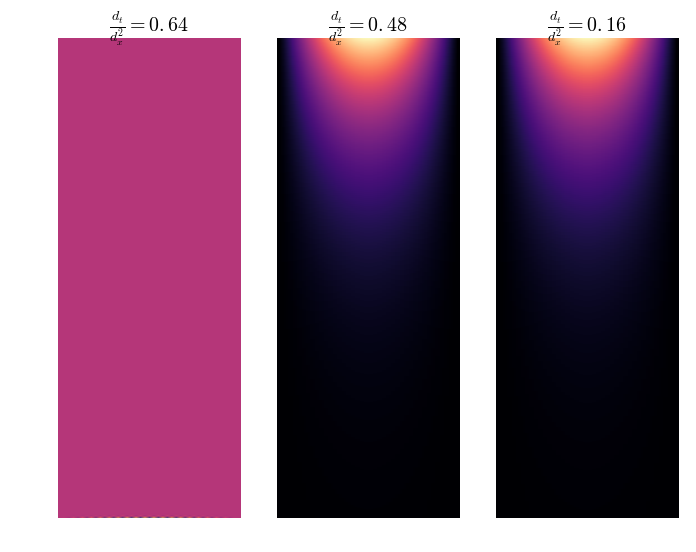

In [5]:
using PyPlot
ax1 = subplot(131)
imshow(for_eul(.0004,.025,.5), aspect="auto", cmap="magma")
title(L"\frac{d_t}{d_x^2}=0.64")
ax1[:axis]("off");
ax2 = subplot(132)
imshow(for_eul(.0003,.025,.5), aspect="auto", cmap="magma")
title(L"\frac{d_t}{d_x^2}=0.48")
ax2[:axis]("off");
ax3 = subplot(133)
imshow(for_eul(.00001,.025,.5), aspect="auto", cmap="magma")
title(L"\frac{d_t}{d_x^2}=0.16")
ax3[:axis]("off");

### Conclusion
Ab $\frac{d_t}{d_x^2} < 1/2$ scheint der Prozess stabil zu laufen. Darueber sind die Werte komplett unbrauchbar.